In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(42)
from sklearn.ensemble import BaggingClassifier

# Question 1

1) Supervised Learning - In supervised learning, the machine learning algorithm is fed training data with already labeled information. For example, a spam filtering algorithm would be fed emails that are labeled as SPAM or not in order to train the algorithm. After beinig fed the classified training data, the machine learning algorithm will learn how to classify real emails based on the patterns in the training data. Similarly, linear regression is a supervised machine learning algorithm. It is fed data with many predictors and the label, it then learns to predict the label value based on the feature value after being given the training data.

2) Unsupervised Learning - In unsupervised learning, the algorithm is given unlabeled training data. For example, the algorithm is fed data with certain demographic information, the algorithm is then able to cluster the data together based on certain features. Clustering algorithms find similarities within the data and creates groups or clusters based on those similarities. Another example of unsupervised learning is dimensionality reduction. The algorithm is able to merge several heavily correlated features into one feature, which captures much of the variation and important information within the dataset while significantly decreasing the dimension.

3) Online Learning - In online learning, the algorithm is fed data incrementally or in small batches called "mini-batches". This method of learning is good for continuous data live stock prices. Each step is fast and the system can learn with each new increment of data on the fly. Online learning is good for instances with limited computing resources. Once the system has learned new data instances, it doesn't need them anymore so they can be discarded whcih is inexpensive and doesn't require large amounts of computing space.

4) Batch Learning - Batch learning is esentially the opposite of online learning, this form of learning has to use the entire dataset at once, it is incapable of learning incrementally. This form of learning takes a large amount of time and is very computationally expensive. However, once it has learned and gone through all of the training data it can be launched and apply what it has learned, this is called offline learning. If you want the batch learning system to learn about new or updated data, you then have to feed the original data with the new data into the system from scratch so it can re-learn with the updated data.

5) Model-Based Learning - This formm of learning uses a model built from the training data in order to make predictions. For example, if you want to understand the relationship between two variables and how the dependent one responds to the independent one you would create a scatter plot to see a relationship. Depending on the shape of the plot(linear, polynomial, etc.) you would choose a model based on the realtionship. Let's say they show a linear relationship, you would train the model with the data you have to determine the parameters(intercept and slope). After the model is trained you can input a value of the independent variable to predict the dependent or target variable. Model-based learning allows you make predictions of new cases or new data by using the trained model.

6) Instance-Based Learning - Instance-based learning is essentially learning by heart, the system groups new data based on previously grouped data. For example, a spam filtering algorithm would flag emails that look the same as previously flagged emails. To make this form of learning more general, you can apply a measure of similarity between emails to flag emails that may not look identical to previously flagged emails. An example of this could be word count in the emails or the commonly used words in the description of spam emails. This form of learning learns by heart and is then generalized to more examples by using measures of similarity.

# QUESTION 2

In [81]:
def random_plot(noise, samples):
    x = 25*(np.random.rand(samples, 1) - 0.8)
    y = 5 * x + 20 * x**2 + 1 * x**3 + noise*np.random.randn(samples, 1)
    plt.plot(x,y,'ro')
    plt.title("Random Plot")
    plt.show()
    X = x.reshape(samples,)
    Y = y.reshape(samples,)
    MSE = []
    for m in range(1, 9):
        p = np.poly1d( np.polyfit(X, Y, m) )
        for i in range(samples):
            e=0
            e += ((y[i]-p(x[i]))**2)/samples
        MSE.append(e)
    print(MSE)
    m = [1, 2, 3, 4, 5, 6, 7, 8]
    plt.plot(m, MSE)
    plt.title("MSE vs Degree")
    plt.show()
    return X, Y

# Parts 1 & 2

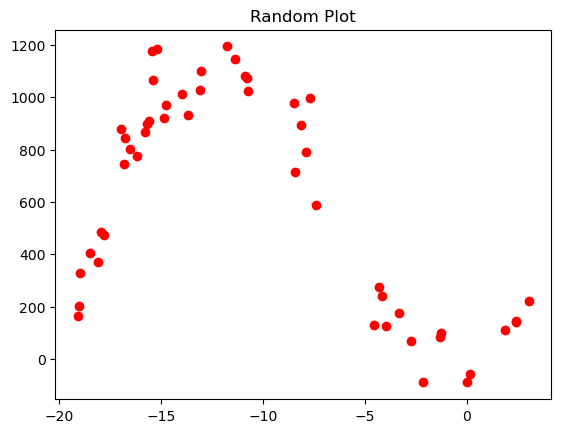

[array([15.29578347]), array([2915.8002081]), array([13.87288124]), array([0.1349542]), array([0.17450058]), array([1.81973713]), array([1.83078172]), array([10.66047083])]


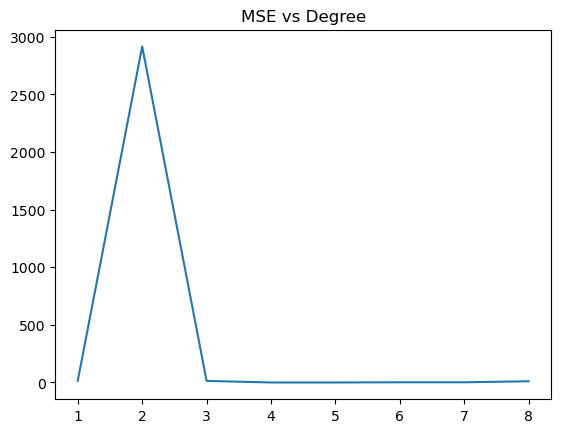

In [82]:
X, Y = random_plot(100, 50)

As seen in the plot, and in the array of MSE values, the polynomial with degree 4 best fits the random polynomial plot. Although the function is of degree 3, the noise in the function makes it so that the smallest MSE is for a degree 4 polynomial. Seen in the function below is the fitted degree 4 polynomial with the noisy data.

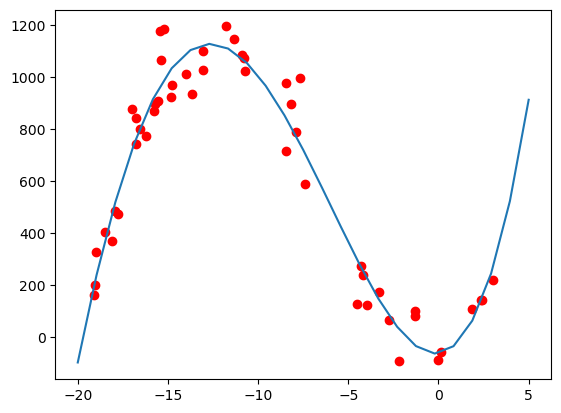

         4         3         2
0.02338 x + 1.822 x + 27.45 x + 9.058 x - 61.47


In [83]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X, Y, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X, Y, 'ro', t, p(t), '-')
plt.show()
print(p)

# Part 3

Noise at 150

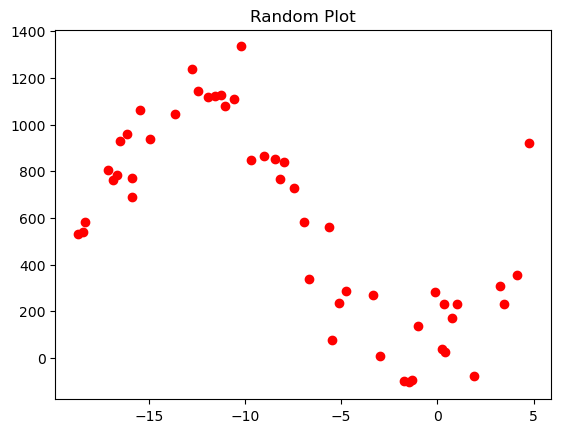

[array([434.79769853]), array([145.99625913]), array([109.47284446]), array([53.55414932]), array([59.53535244]), array([185.98196855]), array([118.84367186]), array([78.04285461])]


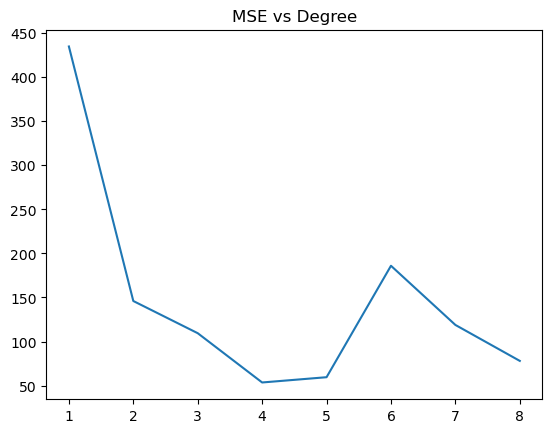

In [84]:
X1, Y1 = random_plot(150, 50)

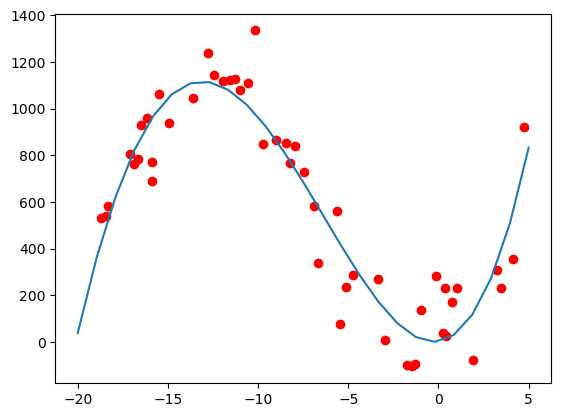

         4         3        2
0.01267 x + 1.393 x + 23.5 x + 12.16 x + 1.596


In [86]:
# Using polyfit func with 4 degrees
p = np.poly1d(np.polyfit(X1, Y1, 4))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X1, Y1, 'ro', t, p(t), '-')
plt.show()
print(p)

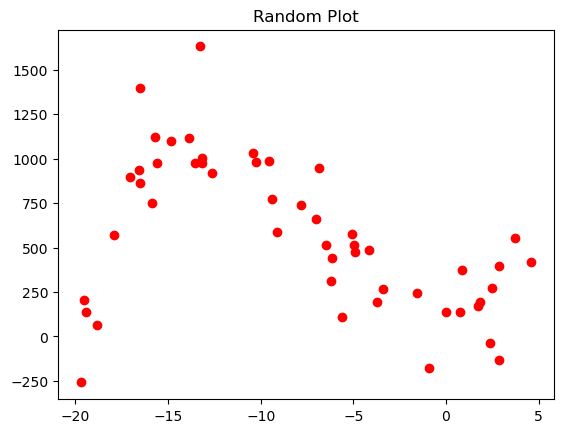

[array([2442.88441449]), array([711.09532048]), array([5.53981823]), array([7.32024765]), array([50.77307706]), array([48.67561162]), array([64.28209496]), array([76.04932689])]


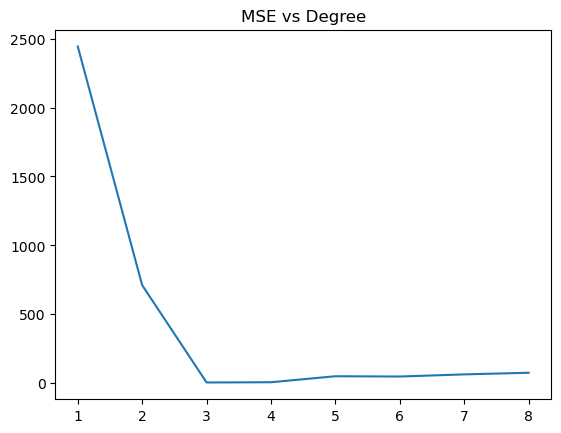

In [88]:
X2, Y2 = random_plot(200, 50)

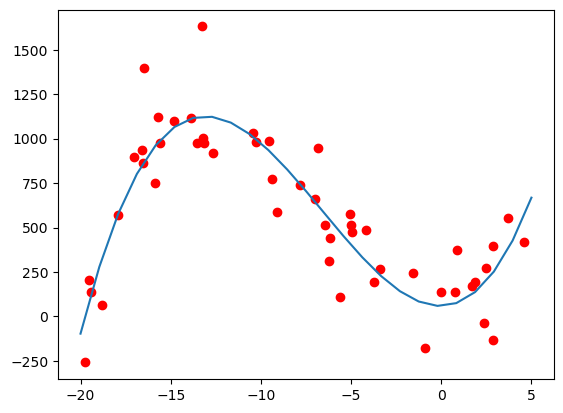

        3         2
0.9659 x + 19.05 x + 2.387 x + 59.2


In [89]:
# Using polyfit func with 3 degrees
p = np.poly1d(np.polyfit(X2, Y2, 3))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X2, Y2, 'ro', t, p(t), '-')
plt.show()
print(p)

Noise at 400

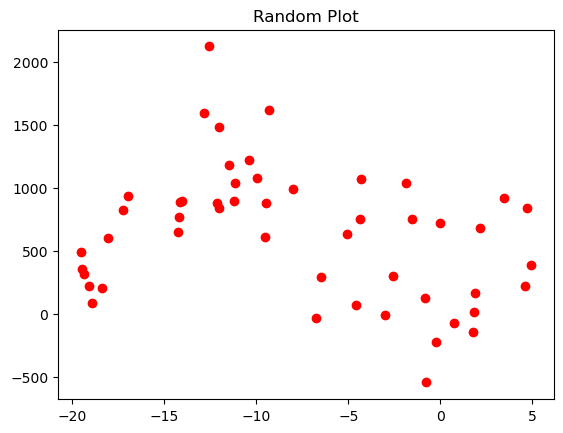

[array([5829.05451672]), array([8914.69825049]), array([2521.50245681]), array([2571.30623744]), array([1913.75882223]), array([2168.49139914]), array([2440.2450254]), array([4348.82151781])]


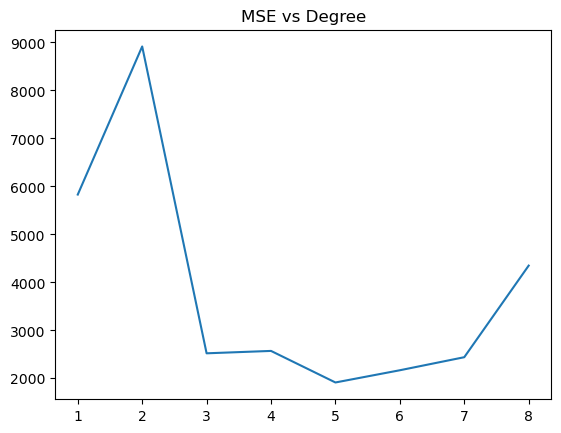

In [90]:
X3, Y3 = random_plot(400, 50)

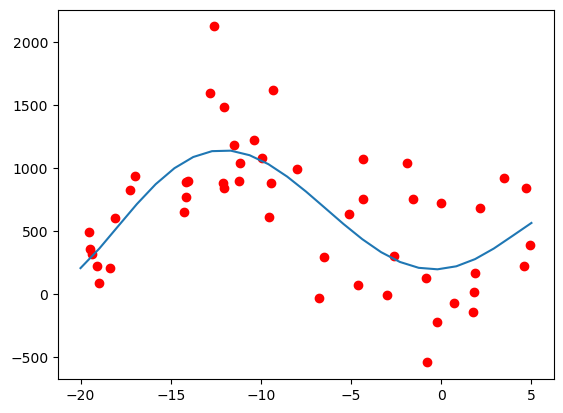

           5          4         3         2
-0.003525 x - 0.1194 x - 0.188 x + 16.46 x + 12.75 x + 197.6


In [91]:
# Using polyfit func with 5 degrees
p = np.poly1d(np.polyfit(X3, Y3, 5))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X3, Y3, 'ro', t, p(t), '-')
plt.show()
print(p)

Noise at 600

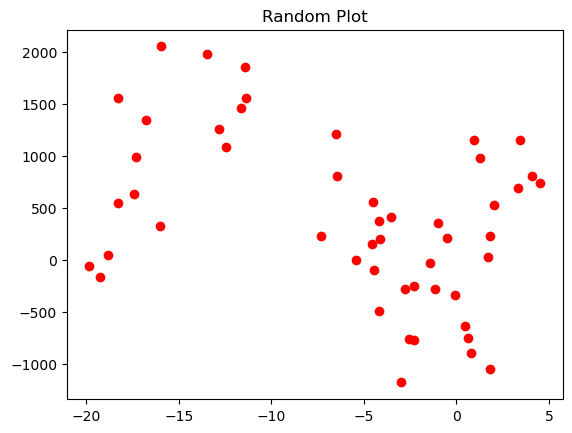

[array([24622.46340873]), array([24959.61710931]), array([25316.3808493]), array([25471.23295711]), array([27786.38457517]), array([32005.41708695]), array([32246.22740099]), array([32233.19475511])]


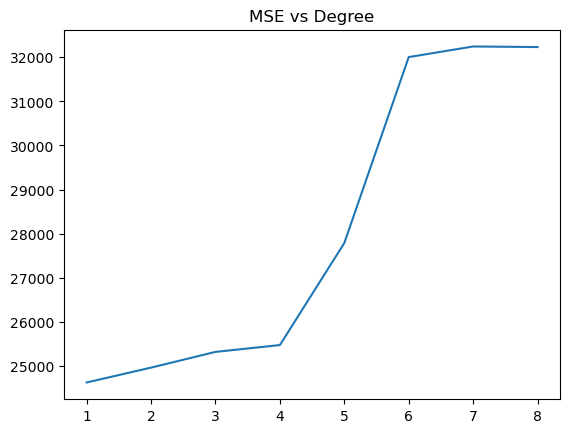

In [92]:
X4, Y4 = random_plot(600, 50)

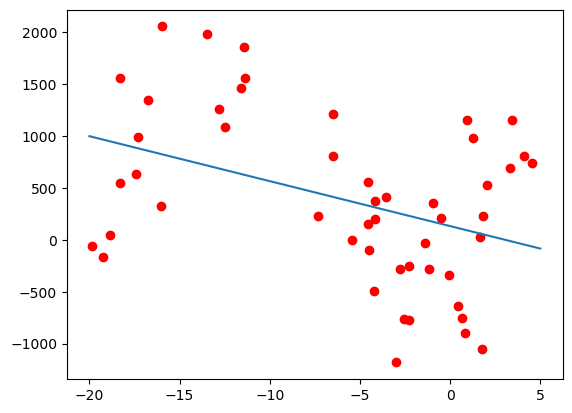

 
-43.3 x + 131.9


In [93]:
# Using polyfit func with 1 degree
p = np.poly1d(np.polyfit(X4, Y4, 1))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X4, Y4, 'ro', t, p(t), '-')
plt.show()
print(p)

Noise at 1000

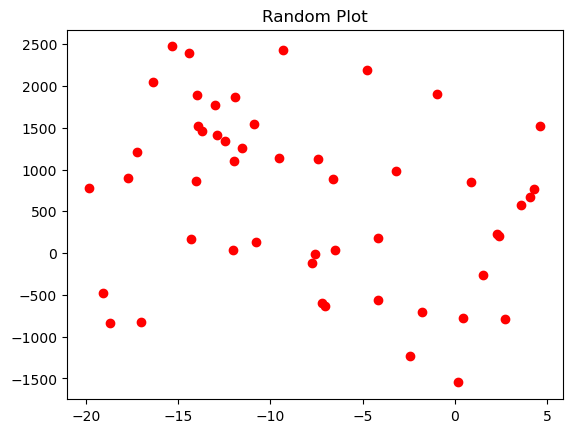

[array([46189.98122695]), array([47845.94340553]), array([30415.78068665]), array([30318.1249275]), array([28323.59811453]), array([27387.53598338]), array([21230.16800629]), array([15394.33215571])]


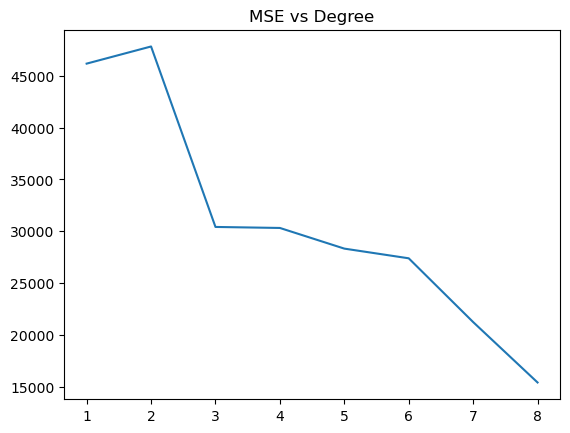

In [95]:
X5, Y5 = random_plot(1000, 50)

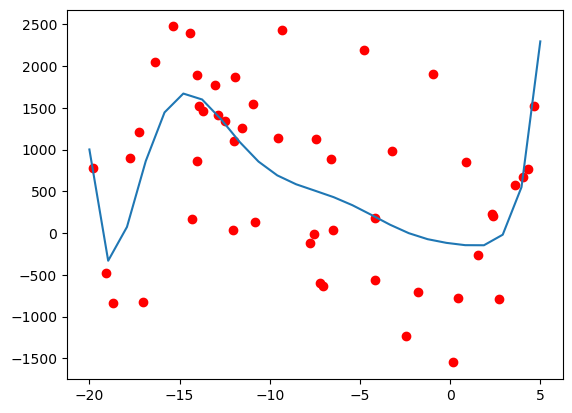

           8            7           6          5          4         3
4.269e-05 x + 0.002318 x + 0.04492 x + 0.3602 x + 0.8759 x - 1.227 x
         2
 + 5.99 x - 30.14 x - 123.4


In [96]:
# Using polyfit func with 8 degrees
p = np.poly1d(np.polyfit(X5, Y5, 8))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X5, Y5, 'ro', t, p(t), '-')
plt.show()
print(p)

Increasing the noise has made it more difficult to determine a relationship in the scatterplot. As you can see, the data shows no clear linear relationship or polynomial relationship for that matter. And the MSE increases greatly when more noise is introduced in the data. This makes it difficult to choose the best m for the regression, because for each value of m the MSE is still very large. As more noise is introduced into the scatterplot, the lower the degree polynomial is recommended to fit the data. This shows that there is little correlation or relationship with very noisy data.

# Part 4

Samples at 40

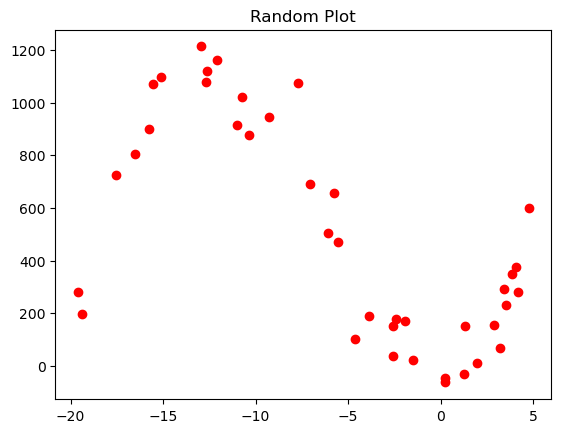

[array([3019.26040531]), array([3270.46316351]), array([126.06021418]), array([26.4435203]), array([26.80671374]), array([25.08493721]), array([34.75563739]), array([94.37042828])]


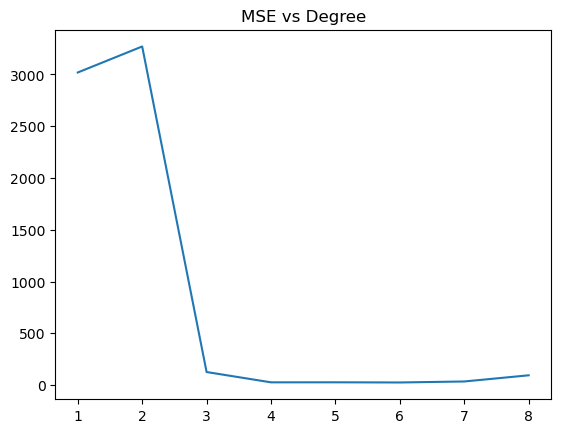

In [97]:
X6, Y6 = random_plot(100, 40)

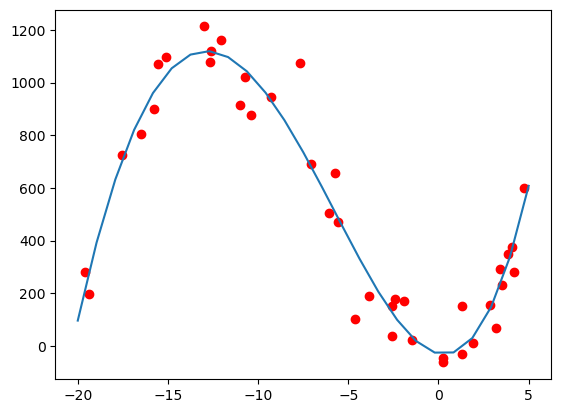

           6            5            4         3         2
-2.27e-05 x - 0.001037 x + 0.001575 x + 1.359 x + 21.52 x - 13.65 x - 29.04


In [98]:
# Using polyfit func with 6 degrees
p = np.poly1d(np.polyfit(X6, Y6, 6))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X6, Y6, 'ro', t, p(t), '-')
plt.show()
print(p)

Samples at 30

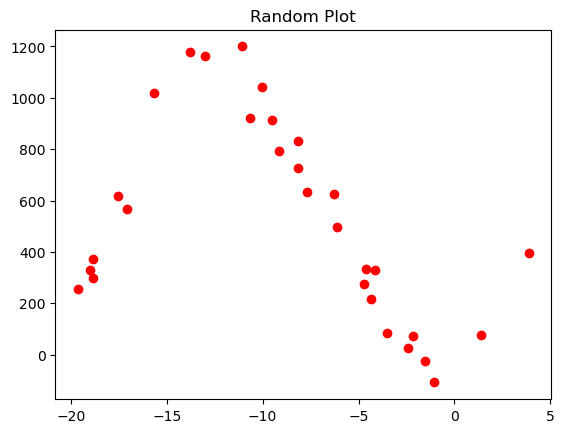

[array([1203.91266205]), array([2488.26075795]), array([65.06463011]), array([77.6626239]), array([17.40477818]), array([33.91091489]), array([81.6716841]), array([133.03429068])]


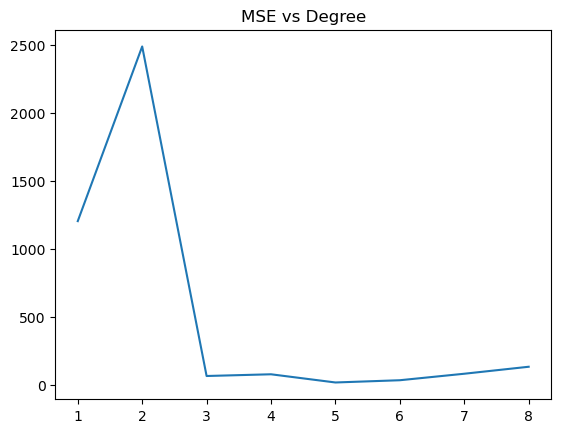

In [99]:
X7, Y7 = random_plot(100, 30)

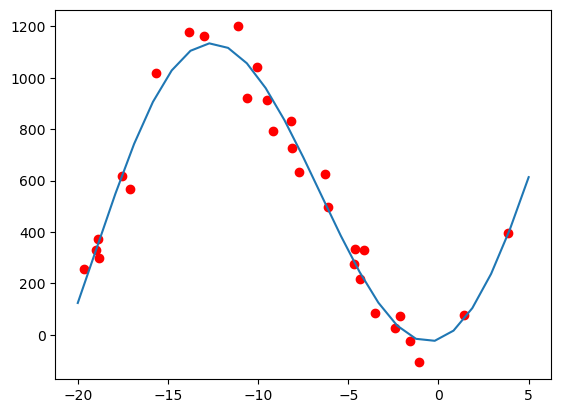

           5          4          3         2
-0.003013 x - 0.0986 x + 0.2576 x + 22.05 x + 24.08 x - 19.55


In [103]:
# Using polyfit func with 5 degrees
p = np.poly1d(np.polyfit(X7, Y7, 5))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X7, Y7, 'ro', t, p(t), '-')
plt.show()
print(p)

Samples at 20

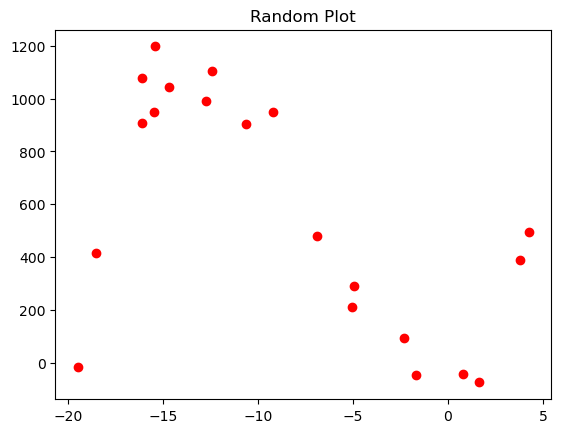

[array([4063.27315429]), array([2438.48412064]), array([811.56727876]), array([806.57514549]), array([428.59014454]), array([361.29738671]), array([367.23683417]), array([298.27794212])]


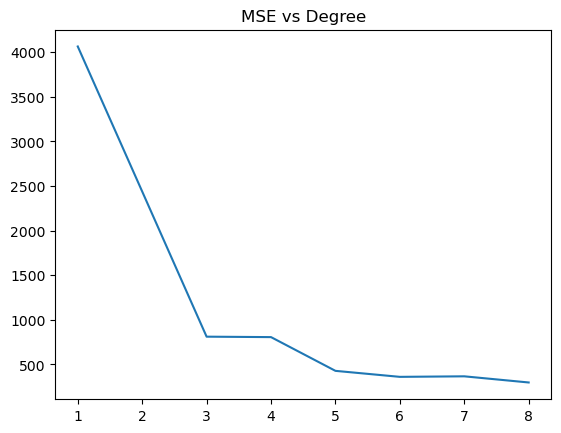

In [101]:
X8, Y8 = random_plot(100, 20)

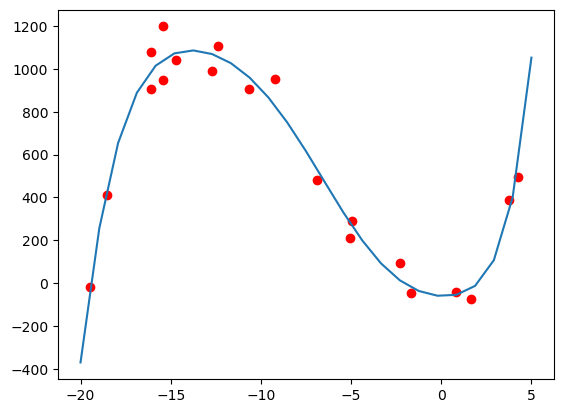

           8             7            6           5          4
3.584e-06 x + 0.0002751 x + 0.007762 x + 0.09782 x + 0.4793 x
           3         2
 + 0.6609 x + 12.05 x - 4.202 x - 59.94


In [102]:
# Using polyfit func with 8 degrees
p = np.poly1d(np.polyfit(X8, Y8, 8))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X8, Y8, 'ro', t, p(t), '-')
plt.show()
print(p)

Samples at 10

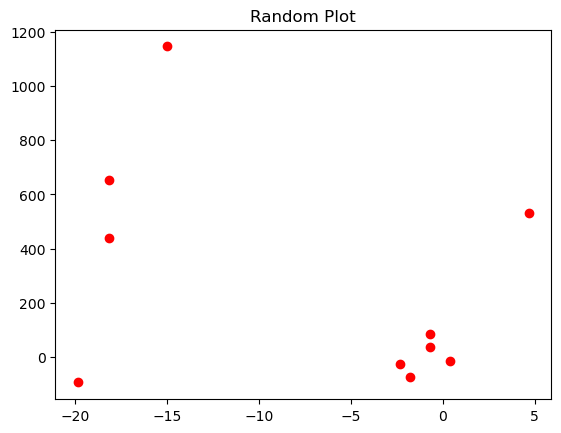

[array([4061.56159351]), array([3809.50690758]), array([1279.5288817]), array([639.81613395]), array([1136.23809211]), array([1224.49006213]), array([884.66497386]), array([0.00524022])]


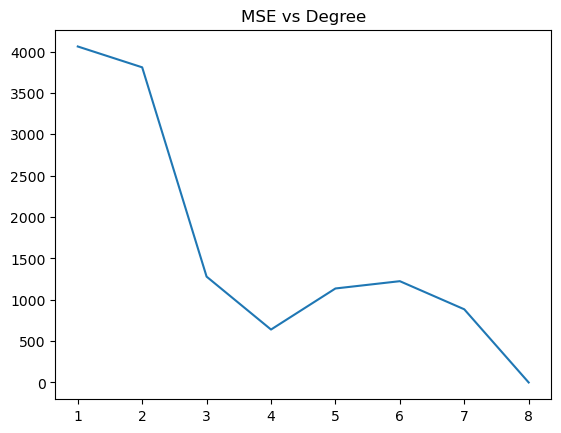

In [106]:
X9, Y9 = random_plot(100, 10)

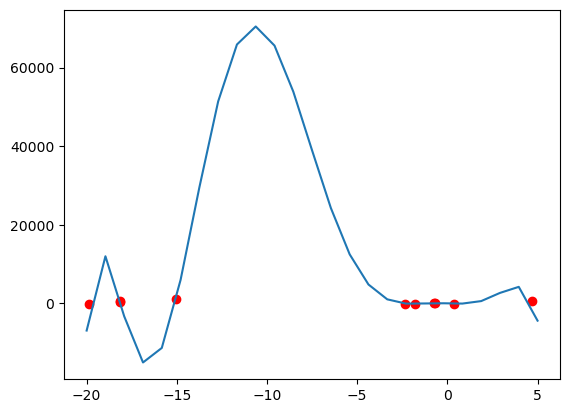

           8           7         6         5         4         3
-0.001528 x - 0.07754 x - 1.219 x - 3.981 x + 36.94 x + 99.44 x
          2
 - 48.31 x - 114.9 x + 31.34


In [108]:
# Using polyfit func with 7 degrees
p = np.poly1d(np.polyfit(X9, Y9, 8))
t = np.linspace(-20, 5, 25)

# Plotting our polynomial function
plt.plot(X9, Y9, 'ro', t, p(t), '-')
plt.show()
print(p)

As the number of samples decreased so did the MSE. This may have to do with overfitting and there being less datapoints to calculate errors from, but with less samples the MSE for the optimal m seems to decrease. When looking at the last plot, we can see that this model overfits the data. If it were a machine learning algorithm it would not be general enough to successfully predict values given some test data. With less samples it's harder to determine a relationship, and using MSE to determine the best value of m will lead to overfitting the polynomial to the data.

In [ ]:
bagging 